In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10


In [16]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [17]:


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [18]:
import numpy as np


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique_labels, label_counts):
    class_name = class_names[label]
    print(f'Class {label} "{class_name}": {count} samples')

Class 0 "airplane": 5000 samples
Class 1 "automobile": 5000 samples
Class 2 "bird": 5000 samples
Class 3 "cat": 5000 samples
Class 4 "deer": 5000 samples
Class 5 "dog": 5000 samples
Class 6 "frog": 5000 samples
Class 7 "horse": 5000 samples
Class 8 "ship": 5000 samples
Class 9 "truck": 5000 samples


<ipython-input-19-9914dab93842>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')
<ipython-input-19-9914dab93842>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='viridis')


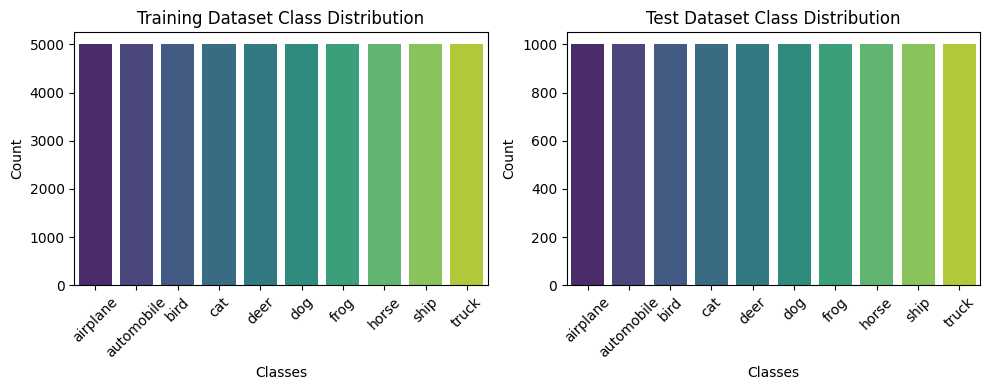

In [19]:
import seaborn as sns
from collections import Counter

# Plotting the class distribution in the training and test datasets
train_counts = Counter(y_train.flatten())
test_counts = Counter(y_test.flatten())

# Creating bar plot for training dataset
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')
plt.title("Training Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)

# Creating bar plot for test dataset
plt.subplot(1, 2, 2)
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='viridis')
plt.title("Test Dataset Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)

plt.tight_layout()
plt.show()

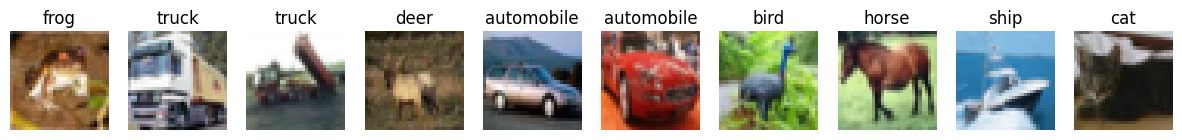

In [20]:

import matplotlib.pyplot as plt
# Show the first 10 images with their labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [21]:

# Normalizing pixel values to range [0, 1]

print(X_train[:5])
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0
print(X_train[:5])


[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [22]:


# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Apply PCA
pca = PCA(n_components=0.98)  # Keep 98% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# Re-scaling after PCA
scaler_after_pca = StandardScaler()
X_train_Re_scaling= scaler_after_pca.fit_transform(X_train_pca)
X_test_Re_scaling = scaler_after_pca.transform(X_test_pca)


print("X_train_Re_scaled shape:", X_train_Re_scaling.shape)
print("y_train shape:", y_train.shape)
print("X_test_Re_scaled shape:", X_test_Re_scaling.shape)
print("y_test shape:", y_test.shape)


X_train_Re_scaled shape: (50000, 448)
y_train shape: (50000, 1)
X_test_Re_scaled shape: (10000, 448)
y_test shape: (10000, 1)


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [24]:

"""

# Dictionary of models and their hyperparameter grids
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}  # GaussianNB doesn't have hyperparameters to tune in this case
    },

    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': { 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10],  'min_samples_leaf': [1, 2, 5],'criterion': ['gini', 'entropy']
}
    },
     'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'poly', 'sigmoid']}
    },

    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [100, 300, 500], 'learning_rate': [0.01, 0.1, 0.05], 'max_depth': [3, 5, 7]}
    }

}

# Store the best models and their results
best_models = {}
results = {}

# Perform GridSearchCV for each model
for model_name, mp in model_params.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_Re_scaling,y_train.ravel())

    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    print(f"Best {model_name} score: {grid_search.best_score_}")
    print(f"Best {model_name} params: {grid_search.best_params_}")

# Display the best model and parameters
print("\nBest Models and Parameters:")
for model_name, result in results.items():
    print(f"{model_name}: Best Score = {result['best_score']}, Best Params = {result['best_params']}")

    """


'\n\n# Dictionary of models and their hyperparameter grids\nmodel_params = {\n    \'Logistic Regression\': {\n        \'model\': LogisticRegression(max_iter=1000),\n        \'params\': {\'C\': [0.01, 0.1, 1, 10, 100], \'solver\': [\'lbfgs\', \'saga\']}\n    },\n    \'Naive Bayes\': {\n        \'model\': GaussianNB(),\n        \'params\': {}  # GaussianNB doesn\'t have hyperparameters to tune in this case\n    },\n\n    \'Decision Tree\': {\n        \'model\': DecisionTreeClassifier(),\n        \'params\': { \'max_depth\': [10, 20, 30, 40], \'min_samples_split\': [2, 5, 10],  \'min_samples_leaf\': [1, 2, 5],\'criterion\': [\'gini\', \'entropy\']\n}\n    },\n     \'Random Forest\': {\n        \'model\': RandomForestClassifier(random_state=42),\n        \'params\': {\'n_estimators\': [100, 200, 300], \'max_depth\': [None, 10, 20, 30], \'min_samples_split\': [2, 5, 10]}\n    },\n    \'KNN\': {\n        \'model\': KNeighborsClassifier(),\n        \'params\': {\'n_neighbors\': [3, 5, 7, 9], 

In [25]:
# Logistic Regression
Logistic = LogisticRegression(C=10, max_iter=5000, multi_class='multinomial', random_state=42, solver='saga')

# Gaussian Naive Bayes
naive = GaussianNB()

# Decision Tree Classifier
decision=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=5,min_samples_leaf=3,random_state=42)

# Random Forest Classifier
random = RandomForestClassifier(max_depth=20, min_samples_split=10, min_samples_leaf=5, n_estimators=300, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=5, weights='distance')

# Support Vector Classifier (SVC)
vector=SVC(C=10,  gamma='scale',kernel='rbf',random_state=42)

# Gradient Boosting Classifier
Gradient_Boosting = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=20, n_estimators=400, random_state=42, subsample=0.8)

lst_models=[Logistic,naive,decision,random,knn,vector,Gradient_Boosting]


accuracy=[]
for idx , model in enumerate(lst_models) :
    print("model: " + str(model))
    model.fit(X_train_Re_scaling,y_train.ravel())
    y_pred=model.predict(X_test_Re_scaling)
    score=accuracy_score(y_test,y_pred)
    accuracy.append(score)
    cm = confusion_matrix(y_test, y_pred)
    AccuracyScore = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("confusion_matrix:\n" + str(cm))
    print(f"Accuracy Score: {AccuracyScore}")
    print(f"Classification Report:\n{report}")
    print("-------------------------")

model: LogisticRegression(C=10, max_iter=5000, multi_class='multinomial',
                   random_state=42, solver='saga')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


confusion_matrix:
[[483  43  54  34  25  28  26  57 180  70]
 [ 58 476  31  36  26  39  35  50  79 170]
 [ 95  35 279  93 117  89 144  80  45  23]
 [ 45  63  98 261  62 197 132  48  34  60]
 [ 57  22 129  75 309  86 161 107  24  30]
 [ 39  48  95 166  80 337  87  74  48  26]
 [ 21  33  69 132 100  95 468  41  16  25]
 [ 51  39  68  72  79  80  37 459  41  74]
 [168  68  24  30  12  38   9  22 530  99]
 [ 76 176  23  29  17  26  50  49  94 460]]
Accuracy Score: 0.4062
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      1000
           1       0.47      0.48      0.48      1000
           2       0.32      0.28      0.30      1000
           3       0.28      0.26      0.27      1000
           4       0.37      0.31      0.34      1000
           5       0.33      0.34      0.33      1000
           6       0.41      0.47      0.44      1000
           7       0.47      0.46      0.46      1000
           8      

# **CNN with SVM**

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf

from keras.utils import to_categorical

# One-hot encoding the labels
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

# Printing shapes to verify
print(f"One-Hot Encoded Training Labels Shape: {y_train_oh.shape}")
print(f"One-Hot Encoded Test Labels Shape: {y_test_oh.shape}")

One-Hot Encoded Training Labels Shape: (50000, 10)
One-Hot Encoded Test Labels Shape: (10000, 10)


In [27]:


# Building Custom CNN Model for Feature Extraction
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

# Using Early Stopping and Training CNN Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_history = model.fit(
    X_train, y_train_oh,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test_oh),
   # callbacks=[early_stopping]
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.3445 - loss: 1.9004 - precision: 0.5223 - recall: 0.1403 - val_accuracy: 0.2731 - val_loss: 1.9922 - val_precision: 0.4392 - val_recall: 0.1025
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.5716 - loss: 1.2067 - precision: 0.7323 - recall: 0.4110 - val_accuracy: 0.5657 - val_loss: 1.3206 - val_precision: 0.6449 - val_recall: 0.4965
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.6531 - loss: 0.9790 - precision: 0.7749 - recall: 0.5291 - val_accuracy: 0.7028 - val_loss: 0.8607 - val_precision: 0.8276 - val_recall: 0.5810
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.7155 - loss: 0.8226 - precision: 0.8134 - recall: 0.6199 - val_accuracy: 0.7280 - val_loss: 0.7737 - val_precision: 0.8179 - val_recall: 0.6493
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.7418 - loss: 0.7415 - precision: 0.8291 - recall: 0.6560 - val_accuracy: 0.7523 - val_los

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step
SVM Model Accuracy: 0.8458
Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.88      0.86      1000
  automobile       0.91      0.94      0.92      1000
        bird       0.79      0.78      0.79      1000
         cat       0.70      0.69      0.70      1000
        deer       0.83      0.84      0.84      1000
         dog       0.78      0.78      0.78      1000
        frog       0.87      0.88      0.87      1000
       horse       0.89      0.87      0.88      1000
        ship       0.93      0.91      0.92      1000
       truck       0.91      0.89      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



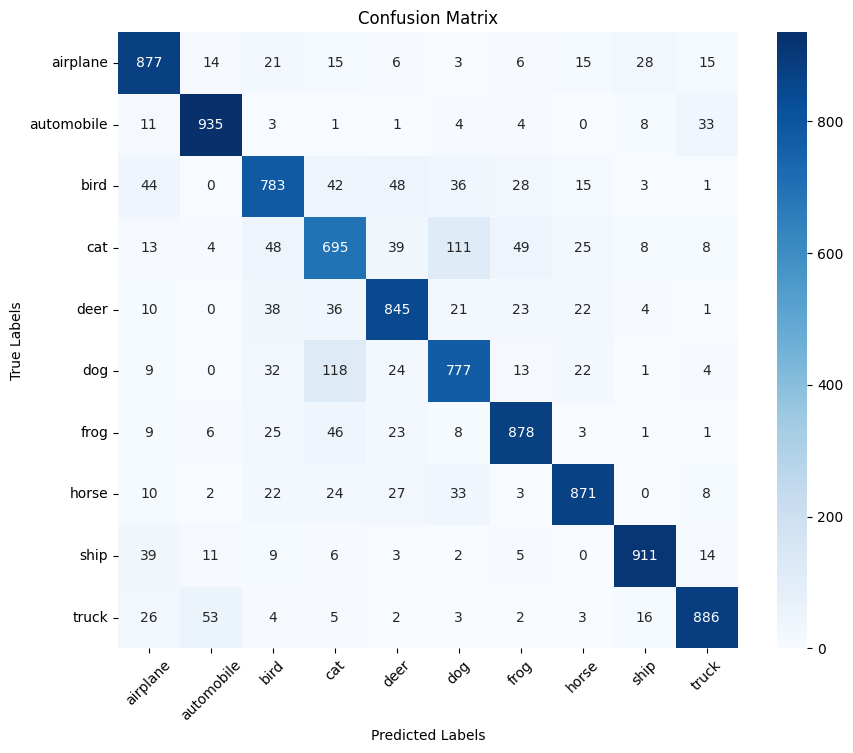

In [28]:

# Using the CNN Model to Extract Features (Removing Softmax Layer)
feature_extractor = Sequential(model.layers[:-1])  # Remove the last softmax layer
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Flattening the extracted features
X_train_features = X_train_features.reshape(len(X_train_features), -1)
X_test_features = X_test_features.reshape(len(X_test_features), -1)

# Training SVM on the Extracted Features
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Training the SVM model without reducing dataset size
svm_model.fit(X_train_features, y_train.flatten())

# Making Predictions on Test Data
y_pred = svm_model.predict(X_test_features)

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")

# Printing Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.show()